<a href="https://colab.research.google.com/github/skreddypalvai/aKX3V0vGhGihpb1s/blob/main/Happy%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Happy Customers:**

### Summary

---


 As a fast-growing startup in the logistics and delivery domain, the company understands the importance of making their customers happy and satisfied. During the COVID-19 pandemic, they encountered various challenges in their operations, and they strived to overcome them. To measure customer happiness, the logistics people conducted a survey among a select customer cohort. Now, they aim to predict the factors that contribute to customer happiness and take the necessary actions based on the insights gained from analyzing the feedback data.

#### **Objective:**

* The main objective of this project is to develop a predictive model that determines customer happiness based on the survey data. The dataset includes customer ratings for six different questions, which will be used to identify patterns and factors influencing customer happiness. By analyzing this data, we aim to build a robust model that can accurately predict whether a customer is happy or not ,insights gained from this analysis will enable the company to take actions to improve overall customer satisfaction and enhance operational efficiency.

In [ ]:
#importing necessary libraries and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


We can observe that there are no null values in the dataset, and there are no issues with datatypes as well.

In [ ]:
#dropping the duplicate values if any
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(110, 7)

We can notice that 16 duplicate rows were dropped from the entire dataset.

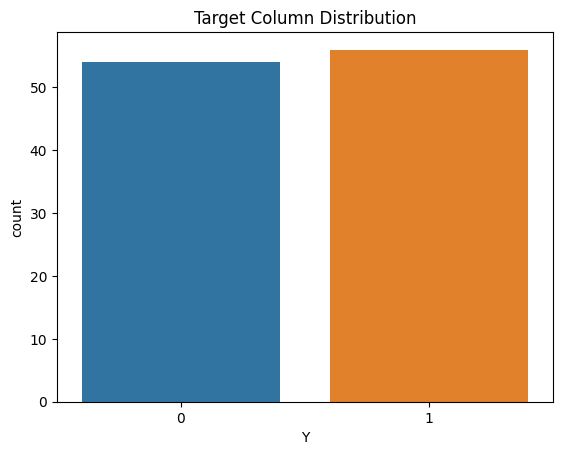

0    54
1    56
Name: Y, dtype: int64


In [ ]:
target_count= df['Y'].value_counts(ascending=True)
#target class distribution
sns.countplot(x='Y', data=df)
plt.title('Target Column Distribution')
plt.show()
print(target_count)

We can conlcude that the target class contains 54 unhappy customers and 56 happy customers.

In [ ]:
#Now, we will define a function to elaborate on stats for each question(features) by target class.
target = df['Y']
# Stacked bar plot for feature1
def stacked_plot(x,title):
  sns.set(palette='Dark2')
  tab1 = pd.crosstab(x,df['Y'],margins=True)
  print(tab1)
  print('-'*120)
  plt.figure(figsize=(4, 3))
  sns.countplot(x= target, hue=x, data=df)
  plt.title(f'Stacked Bar Plot for {title} by Target Class')
  plt.show()

Y     0   1  All
X1              
1     1   0    1
3    12   6   18
4    22  14   36
5    19  36   55
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


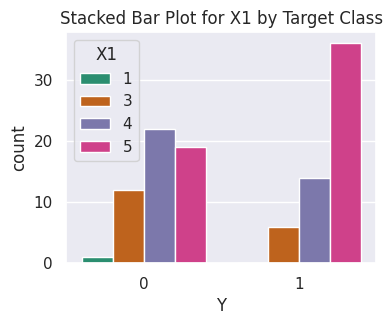

In [ ]:
stacked_plot(df['X1'],'X1')

Y     0   1  All
X2              
1    13  10   23
2    12  18   30
3    18  19   37
4     9   6   15
5     2   3    5
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


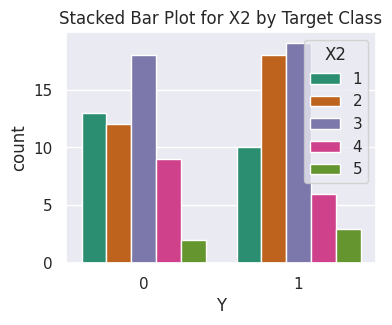

In [ ]:
stacked_plot(df.X2,'X2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Y     0   1  All
X3              
1     4   2    6
2     7   6   13
3    28  22   50
4    10  17   27
5     5   9   14
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


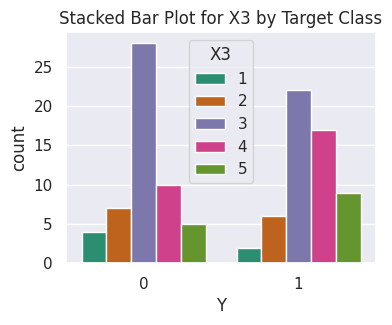

In [ ]:
stacked_plot(df.X3,'X3')

Y     0   1  All
X4              
1     0   2    2
2     4   1    5
3    19  16   35
4    22  24   46
5     9  13   22
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


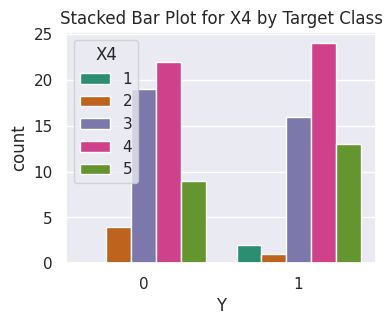

In [ ]:
stacked_plot(df.X4,'X4')

Y     0   1  All
X5              
1     5   2    7
2     9   7   16
3    11   8   19
4    21  20   41
5     8  19   27
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


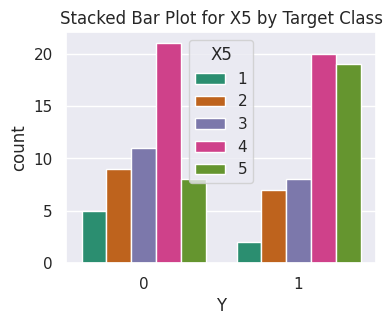

In [ ]:
stacked_plot(df.X5,'X5')

Y     0   1  All
X6              
1     0   1    1
2     1   0    1
3    14   6   20
4    18  22   40
5    21  27   48
All  54  56  110
------------------------------------------------------------------------------------------------------------------------


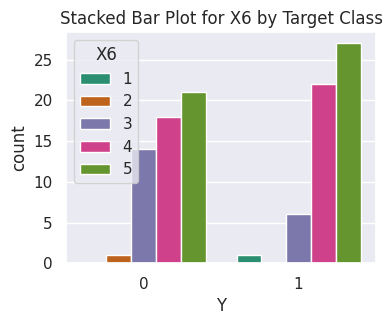

In [ ]:
stacked_plot(df.X6,'X6')

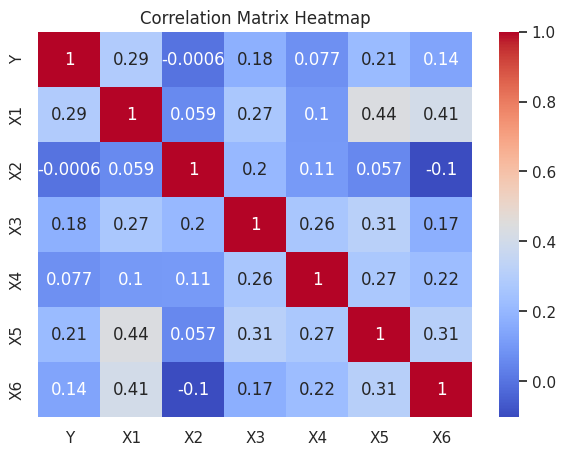

In [ ]:
#constructing a correlation matrix to find linear relationship between the features and the target
correlation_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

* In General, if the correlation value is closer to +1, it indicates a strong positive correlation. However, if the correlation value is closer to -1, it indicates a weak negative correlation.
* The features X1, X5, and X3 have a strong positive correlation with values of 0.29, 0.21, and 0.18 respectively. On the other hand, the features X2, X4 and X6 show a weak correlation with the target class.

Note:
It's important to note that correlation doesn't always determine feature importance because it doesn't capture non-linear relationships between features and the target class. So, the best way to determine the feature importance is through model training.

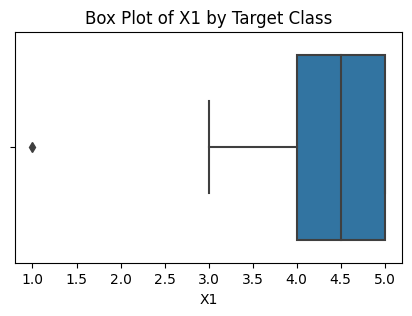

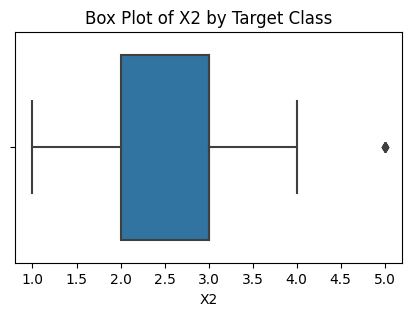

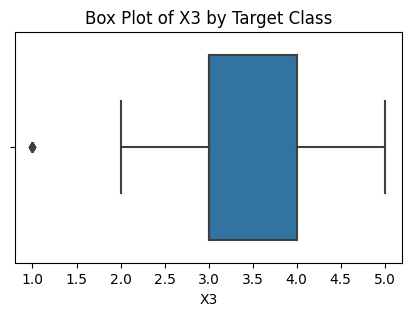

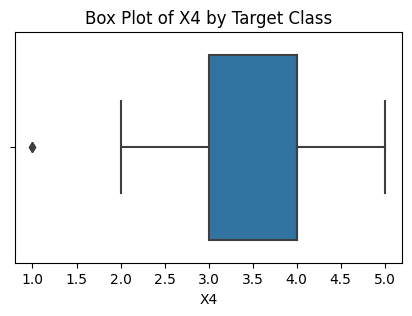

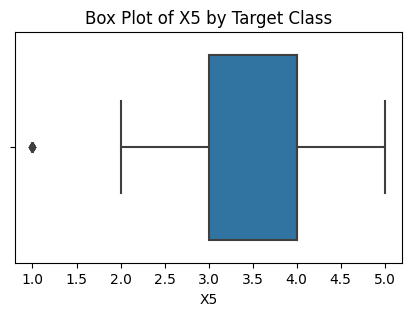

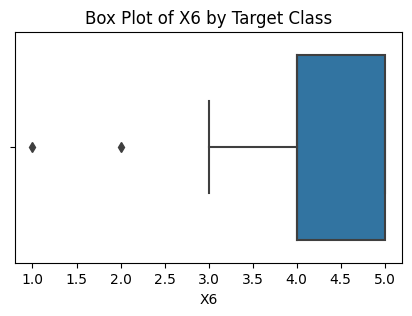

In [ ]:
# we will create box plot for each feature in the dataset to detect outliers and visualize how the distribution of each feature varies with the target variable Y.
features = ['X1','X2','X3','X4','X5','X6']
for feature in features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature} by Target Class')
    plt.show()
#


Here, we can see that X6 has two outliers. We will use winsorizing technique to treat the outliers accordingly.

Note: Winsorization is a transformation technique, which is used to handle  outliers in numerical data.






In [ ]:
#splitting the data for modeling
x = df.drop('Y',axis=1)
y = df['Y']

In [ ]:
# we will define a function to winsorize x columns
def winsorize_series(series, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(series, lower_percentile)
    upper_bound = np.percentile(series, upper_percentile)
    return np.clip(series, lower_bound, upper_bound)

# Apply Winsorization to each feature
for col in x.columns:
  x[col] = winsorize_series(x[col])
# outliers are treated

#### **Modeling**


We will train the Decision Tree classifier model on the data because tree-based models can capture non-linear relationships between features and the target. To achieve higher accuracy, we will use the grid search method to tune the hyperparameter values for the model. Optimal hyperparameter values result in higher accuracy.

##### **Decision Tree Classifier:**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
param_dt = {'max_depth':[3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08],'max_features':[0.2,0.4,0.6,0.8]}
grid_dt = GridSearchCV(estimator=dt,param_grid=param_dt,scoring='accuracy',cv=10,n_jobs=-1)
grid_dt.fit(x_train,y_train)
grid_dt.best_params_

{'max_depth': 4, 'max_features': 0.6, 'min_samples_leaf': 0.08}

In [ ]:
#instantiating the model with the respective tuned hyperparameter values
dt = DecisionTreeClassifier(max_depth=4,random_state=42,max_features=0.6,min_samples_leaf=0.08)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
acc = accuracy_score(y_test,pred)
acc

0.6086956521739131

Model reached the accuracy of almost 61%. But our main objective is to reach more than 73% accuracy. We will calculate the recall, precision and f1 and perform important feature visualization.

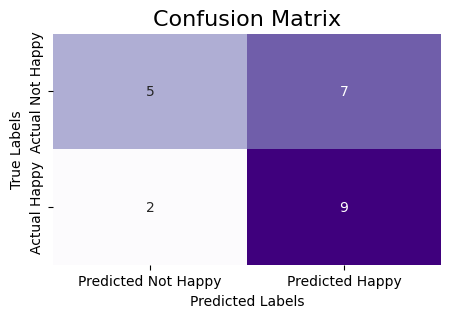

Recall: 0.82
Precision: 0.56
F1 Score: 0.67


In [ ]:
cm = confusion_matrix(y_test,pred)
# Calculate recall, precision, and F1 score
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
f1 = f1_score(y_test, pred)
# we will Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Not Happy', 'Actual Happy'], columns=['Predicted Not Happy', 'Predicted Happy'])
# we will plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

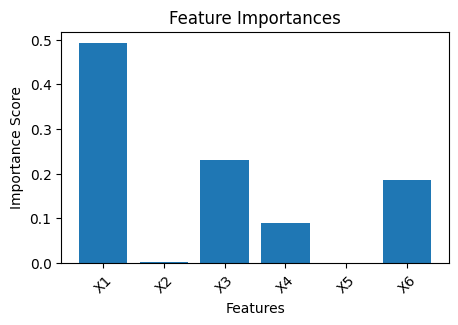

In [ ]:
feature_importances = dt.feature_importances_
# Step 8: Visualize the feature importances using a bar chart
plt.figure(figsize=(5, 3))
plt.bar(x.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

We can observe from the above graph that X1 have high importance score followed by X3 and X6. Where as, X2 and X5 have very negligible importance value. It is evident that  X2 is not a good feature to include in the model training  by comparing the correlation score and feature importance score. So, we will drop the X2 feature.

In [ ]:
#dropping X2 feature
x = df.drop('X2',axis=1)

##### **Random Forest Classifier:**


 let's try using a random forest model to achieve higher accuracy compared to the decision tree model.
Let's see how it performs:

Tuning Hyperparameters with GridSearch

In [ ]:
# tuning hyperparameters
X_train, X_test, Y_train, Y_test = train_test_split(x, y,stratify=y, test_size=0.2,random_state=42) #X2 dropped
rf_classifier = RandomForestClassifier(random_state=42)
# Defining hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Performing Grid Search Cross-Validation to find the best hyperparameters
grid_search1 = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)
grid_search1.fit(X_train, Y_train)
# we will Get the best hyperparameters and train the final model
best_rf_classifier1 = grid_search1.best_estimator_
best_rf_classifier1.fit(X_train, y_train)
# making  predictions on the test set
y_pred = best_rf_classifier1.predict(X_test)
# we will calculate the accuracy score on the test set
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {grid_search1.best_params_}")
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on test set: 65.22%


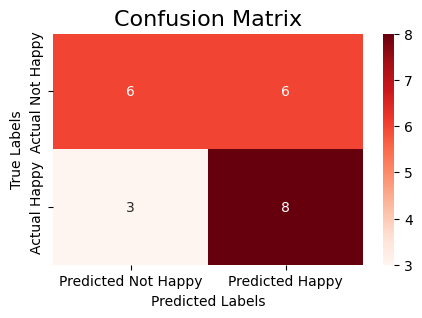

Recall: 0.73
Precision: 0.57
F1 Score: 0.64


In [ ]:
CM = confusion_matrix(Y_test,y_pred)
Precision = precision_score(Y_test,y_pred)
Recall = recall_score(Y_test,y_pred)
F1 = f1_score(Y_test,y_pred)
# Creating a DataFrame for the confusion matrix for better visualization
CM_df = pd.DataFrame(CM, index=['Actual Not Happy', 'Actual Happy'], columns=['Predicted Not Happy', 'Predicted Happy'])
# we will plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(CM_df, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print("Recall: {:.2f}".format(Recall))
print("Precision: {:.2f}".format(Precision))
print("F1 Score: {:.2f}".format(F1))

Considering the Recall score,  model correctly identifies 73% of the happy customers, but it incorrectly labels 27% of the happy customers as unhappy. On the other hand, the precision score is 57%, which means that the  model's positive prediction for happy customers is 57%, This implies that a significant number of unhappy customers are being incorrectly classified as happy by the model.

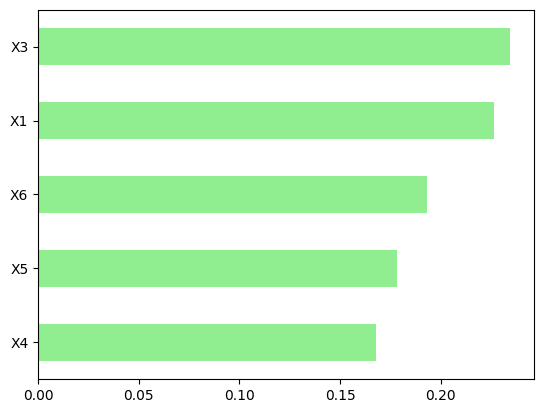

In [ ]:
important_features = pd.Series(best_rf_classifier1.feature_importances_,index=X.columns)
sorted_importance_rfc = important_features.sort_values()
sorted_importance_rfc.plot(kind='barh', color='lightgreen')
plt.show()

From the above graph, we can witness that X3 and X1 have high importance score, followed by X6, X5, and X4. By comparing the three graphs, we can conclude that X1 and X3 has the high feature importance score. To decide important features precisely , we will use light gbm model.

#### **Light GBM**

Tuning hyperparameter values using randomized search on light gbm

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)

In [ ]:
#defining hyperparamters and instantiating the model.
model1 = lgb.LGBMClassifier()
param_grid = {
    'num_leaves': np.arange(20, 200, 5),
    'learning_rate': np.logspace(-3, 0, 100),
    'n_estimators': np.arange(50, 500, 10),
    'min_child_samples': np.arange(5, 50, 5)
}
random_search1 = RandomizedSearchCV(model1, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)
random_search1.fit(X1_train,Y1_train)
best_params1 = random_search1.best_params_
best_params1

{'num_leaves': 195,
 'n_estimators': 170,
 'min_child_samples': 30,
 'learning_rate': 0.012328467394420659}

In [ ]:
# fitting the model with best parameters
lgb_model1 = lgb.LGBMClassifier(num_leaves= 195,
 n_estimators= 170,
 min_child_samples= 30,
 learning_rate= 0.012328467394420659)
lgb_model1.fit(X1_train,Y1_train)
predictions2 = lgb_model1.predict(X1_test)
score = accuracy_score(Y1_test,predictions2)
score

0.7391304347826086

Finally, light gbm attained the accuracy of almost 74%. Let's see the presicion score, recal score and feature importance score.

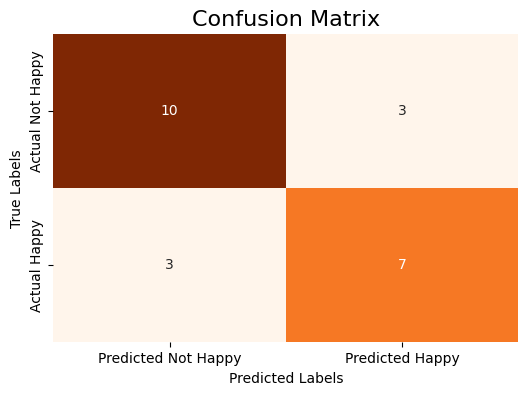

Recall: 0.70
Precision: 0.70
F1 Score: 0.70


In [ ]:
CM1 = confusion_matrix(Y1_test,predictions2)
Precision1 = precision_score(Y1_test,predictions2)
Recall1 = recall_score(Y1_test,predictions2)
F1_1 = f1_score(Y1_test,predictions2)
# Creating a DataFrame for the confusion matrix for better visualization
CM_df1 = pd.DataFrame(CM1, index=['Actual Not Happy', 'Actual Happy'], columns=['Predicted Not Happy', 'Predicted Happy'])
# we wil plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(CM_df1, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print("Recall: {:.2f}".format(Recall1))
print("Precision: {:.2f}".format(Precision1))
print("F1 Score: {:.2f}".format(F1_1))

Finally, LightGBM model attained a good precision and recall scores.

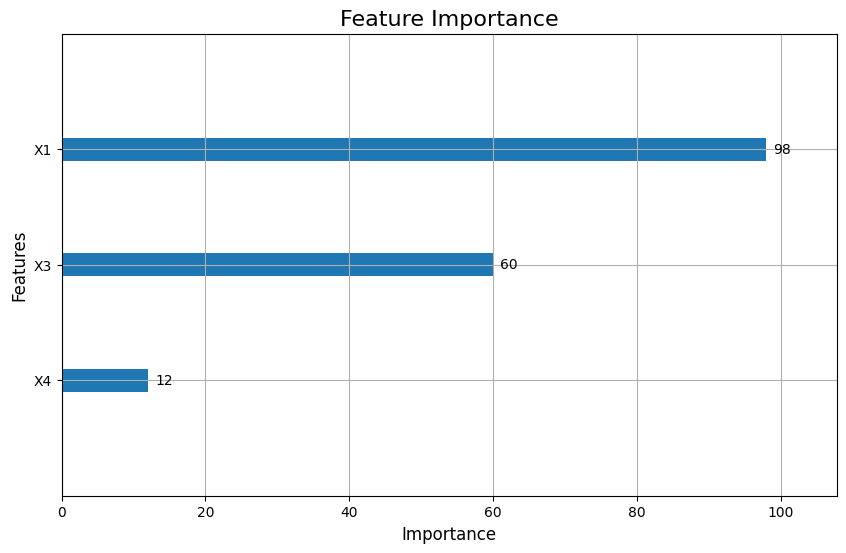

In [ ]:
lgb.plot_importance(lgb_model1, figsize=(10, 6))
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

By comparing all the feature importance score graphs, we can conclude that the **X1, X3, X4, and X6** are the important features of the dataset.